<a href="https://colab.research.google.com/github/jbEmanuel/Build-a-Regression-Model-in-Keras---Coursera-AI-Course/blob/main/Build_a_Regression_Model_in_Keras_Coursera_AI_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read The Libraries

Note: In order to have a great experience using this file, is highly recomendable to:
1. Run this using Google Colab
2. Change to GPU mode in order to be fast

In [28]:
#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#pip install keras==2.1.6

In [29]:
import pandas as pd
import numpy as np

I. Concrete Data:

For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

In [30]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
concrete_data.shape

(1030, 9)

In [32]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [33]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [34]:
concrete_data_columns = concrete_data.columns

X = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
y = concrete_data['Strength'] # Strength column

In [35]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [36]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Create Train and Test Dataset

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=4)

(X_test.shape, X_train.shape), (y_test.shape, y_train.shape)


(((206, 8), (824, 8)), ((206,), (824,)))

In [38]:
# get columns to use in the input layer
n_cols = X.shape[1]
n_cols

8

In [39]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

#### Let's go ahead and import the Keras library

In [40]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import keras

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [43]:
from keras.models import Sequential
from keras.layers import Dense

Note: I tried with two hidden layers and then with 3 hidden layers

In [44]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['MeanSquaredError'])
    return model

In [45]:
# build the model
model = regression_model()

In [46]:
# fit the model
n_epochs = range(100, 1000,100)
mae = keras.losses.MeanAbsoluteError()

error = []

for epoch in list(n_epochs):
  model.fit(X_train, y_train, epochs= epoch , verbose=2)
  y_pred = model.predict(X_test)  
  error.append(mae(y_test, y_pred).numpy())



A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 501/600
26/26 - 0s - loss: 2.6363 - mean_squared_error: 2.6363 - 61ms/epoch - 2ms/step
Epoch 502/600
26/26 - 0s - loss: 2.5635 - mean_squared_error: 2.5635 - 59ms/epoch - 2ms/step
Epoch 503/600
26/26 - 0s - loss: 2.4812 - mean_squared_error: 2.4812 - 64ms/epoch - 2ms/step
Epoch 504/600
26/26 - 0s - loss: 2.4268 - mean_squared_error: 2.4268 - 66ms/epoch - 3ms/step
Epoch 505/600
26/26 - 0s - loss: 2.6686 - mean_squared_error: 2.6686 - 57ms/epoch - 2ms/step
Epoch 506/600
26/26 - 0s - loss: 2.1905 - mean_squared_error: 2.1905 - 73ms/epoch - 3ms/step
Epoch 507/600
26/26 - 0s - loss: 2.2555 - mean_squared_error: 2.2555 - 62ms/epoch - 2ms/step
Epoch 508/600
26/26 - 0s - loss: 2.3682 - mean_squared_error: 2.3682 - 58ms/epoch - 2ms/step
Epoch 509/600
26/26 - 0s - loss: 2.2177 - mean_squared_error: 2.2177 - 58ms/epoch - 2ms/step
Epoch 510/600
26/26 - 0s - loss: 2.4536 - mean_squared_error: 2.4536 - 69ms/epoch - 3ms/step
Epoch 511/6

In [47]:
error

[20.105944,
 20.082773,
 19.949385,
 20.342102,
 19.945938,
 20.36627,
 20.07079,
 20.005877,
 20.001535]

In [49]:
min(error)

19.945938

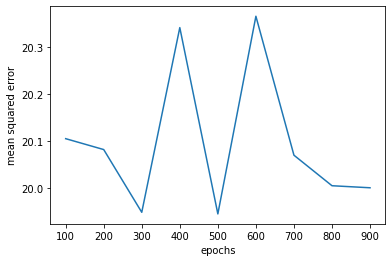

In [48]:
import matplotlib.pyplot as plt

plt.plot(list(n_epochs), error)
plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.show()

Conclusion: We can note that even running with 3 hidden layers, the Mean squared error didn't improve, but as I left you can run using only two hidden layers and the results will be great.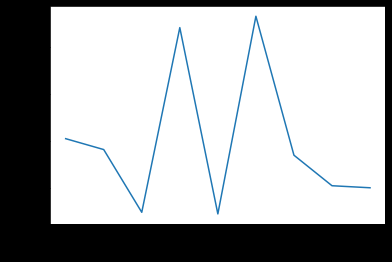